In [1]:
from expetator.tools import read_experiment, show_heatmap, add_objectives
from expetator.tools import prune_vectors, mojitos_to_vectors, show_pct_distribution
from expetator.monitors import mojitos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
knowledge_data = pd.read_csv("knowledge_allmetrics.csv")
vectors_data = pd.read_csv("vectors_allmetrics.csv")
error_dict = {}

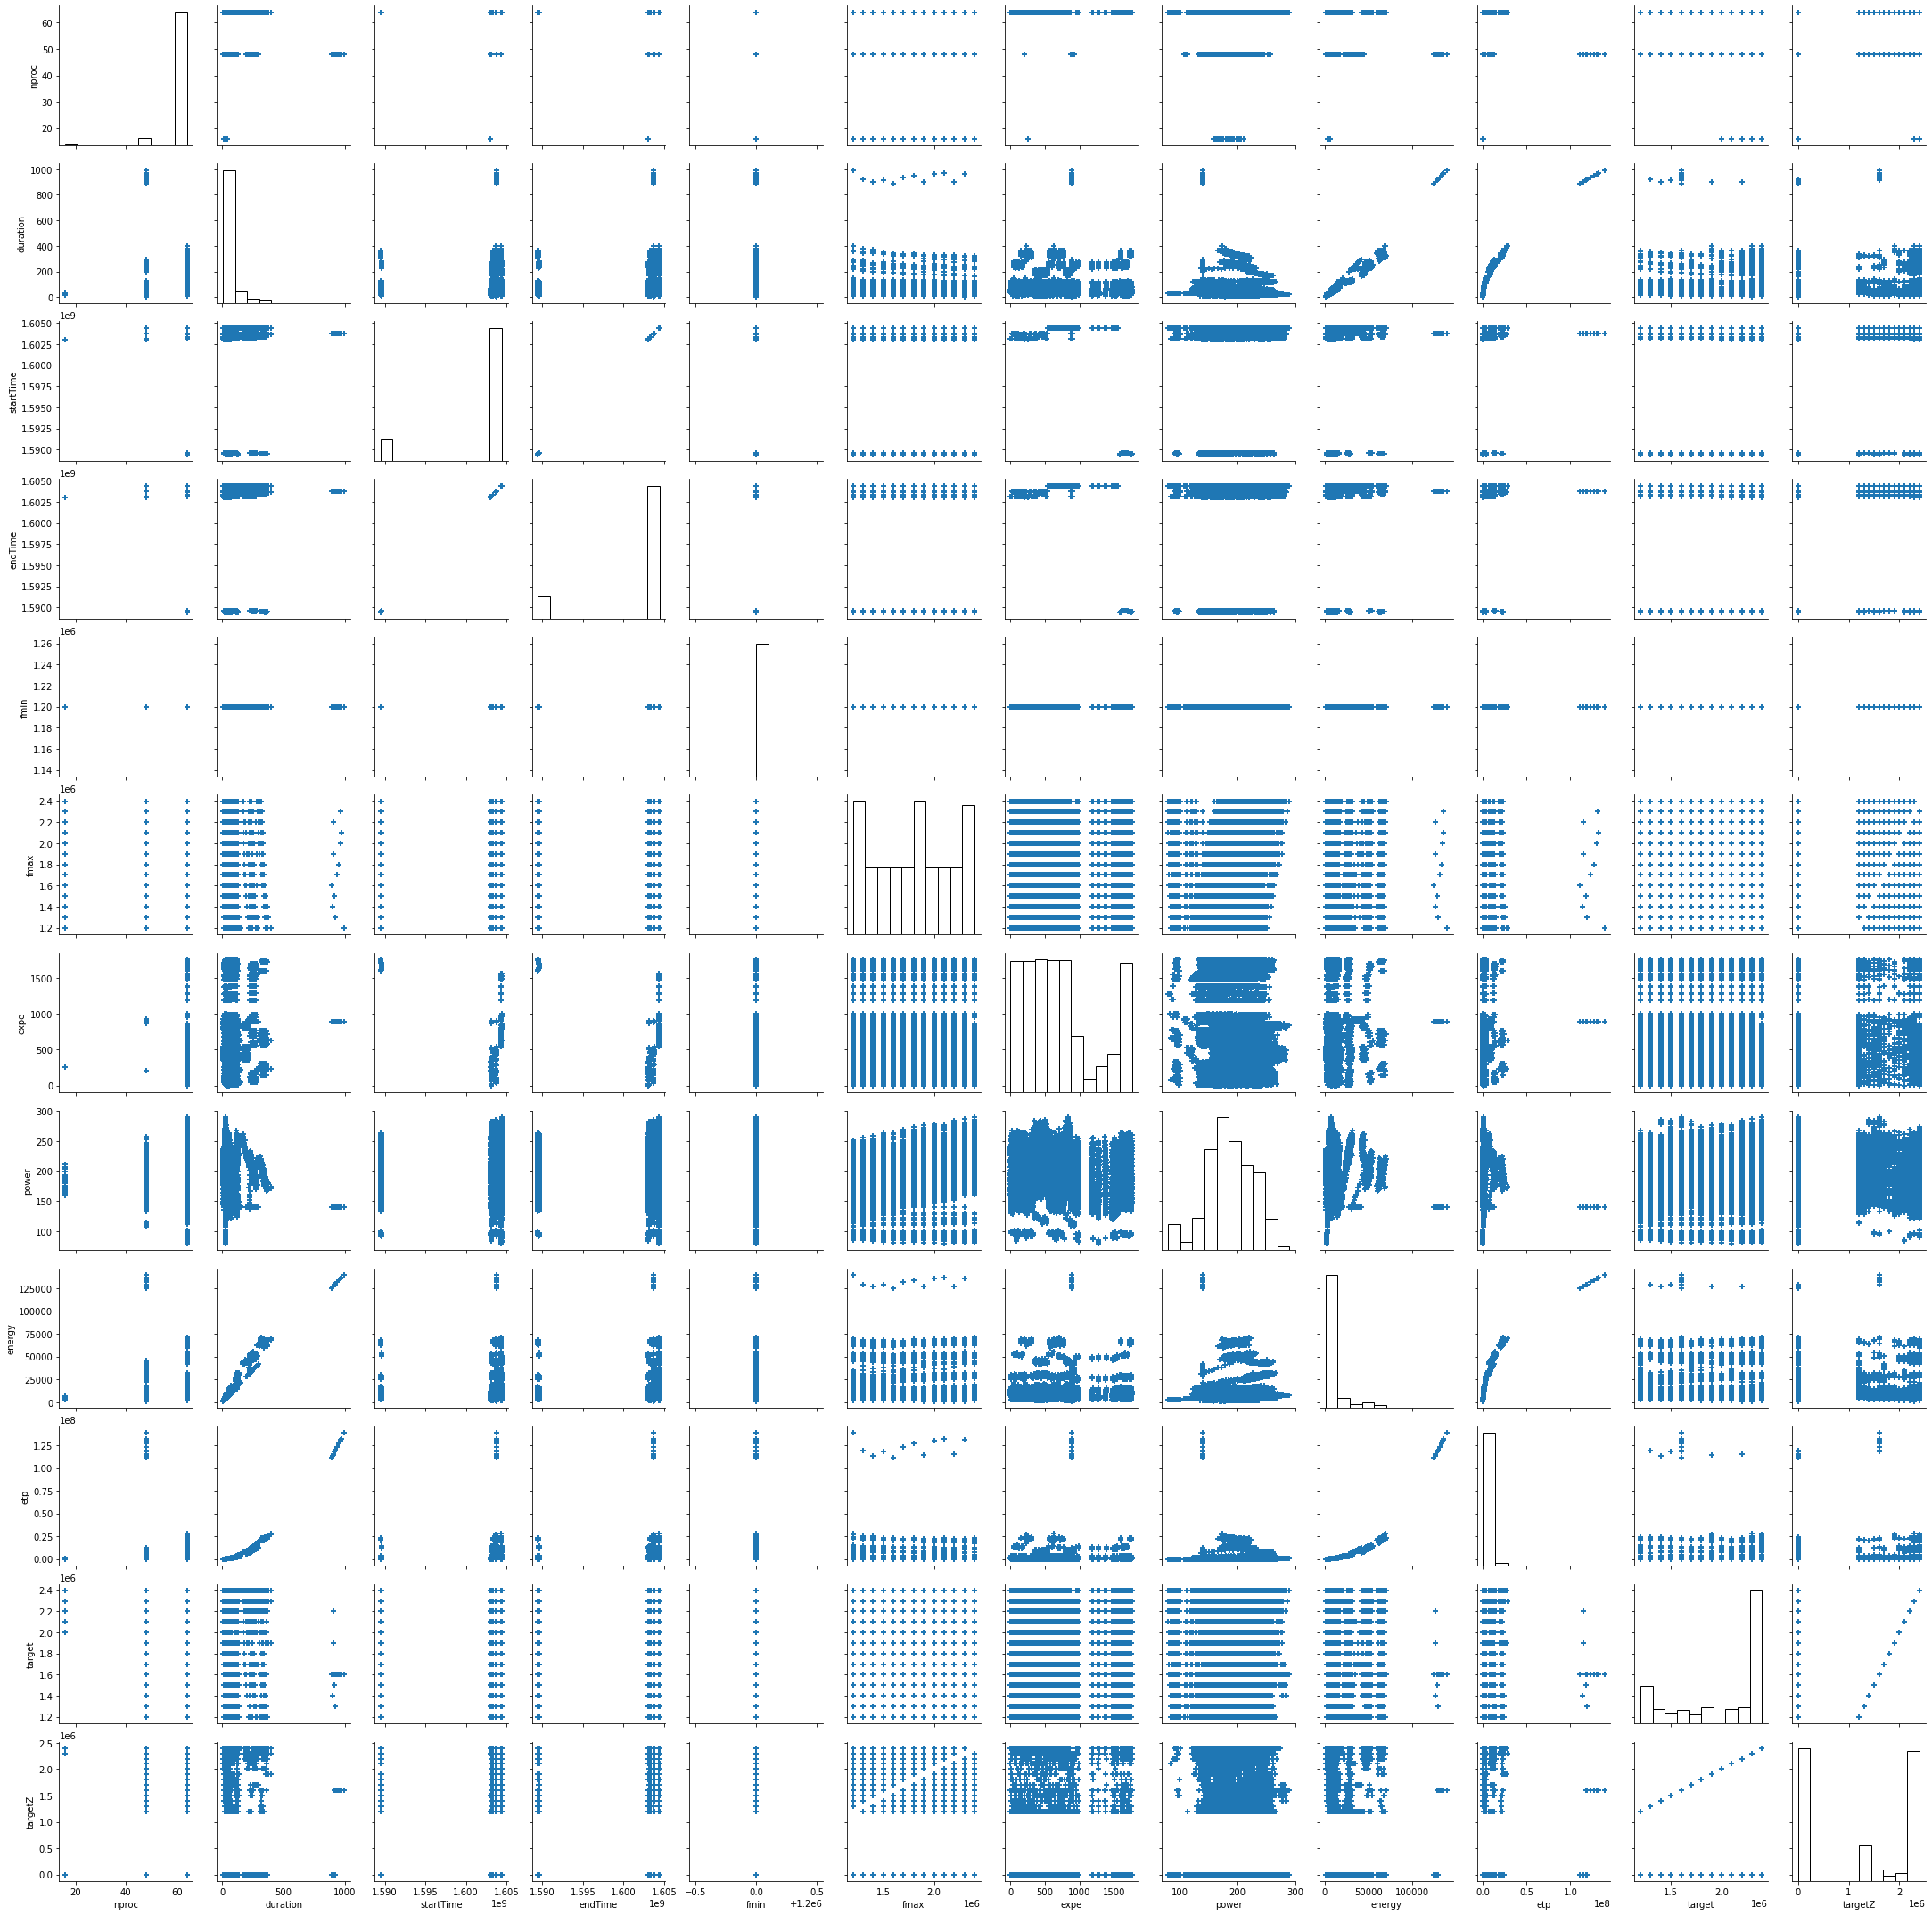

In [132]:
# ploting just to check range and values for knowledge
sns.pairplot(
    knowledge_data,
    plot_kws=dict(marker="+", linewidth=2),
    diag_kws=dict(fill=False),
)

# Feture scaling
This is important to start further depth analysis.

From previous analysis (last semester) of linear regression some fetures were not at all useful and no meaning to keep them. 

First step is to remove those features and do again the linear regression.

Linear Regression here is comparing each feature from knowledge to vector.

Each feature comparision gives mean squre error which is kept in dictionary to get further analysis.

In [7]:
vector = vectors_data.drop(['alignment_faults','bpf_output','page_faults_maj','dummy','emulation_faults','nice','irq','steal','guest','guest_nice','irxp','irxb','itxp','itxb','core0','core1','package-00','package-11','dram0','idle','softirq','txp','txb','rxp','rxb','iowait','dram1','user','system','context_switches'], axis=1)
knowledge = knowledge_data.drop(['hostname','fullname','startTime','endTime','nproc', 'hostlist','basename','expe','etp','target','metric'], axis=1)

In [120]:
#ditionary to store values by linear regression
def append_value(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        dict_obj[key] = value

In [121]:
def linear_regression(knowledge_values,vector_values,knowledge_feature,vector_feature):
    #mean of independent and dependent
    mean_x = np.mean(knowledge_values)
    mean_y = np.mean(vector_values)

    #total number of values
    m = len(knowledge_values)

    numer=0
    denom=0

    for i in range(m):
        numer += (knowledge_values[i]-mean_x)*(vector_values[i]-mean_y)
        denom += (knowledge_values[i]-mean_x)**2
    
    #y= mx + c
    b1 = numer/denom #m
    b0 = mean_y - (b1 * mean_x) #c

    
    #plotting values and regression line
    max_x = np.max(knowledge_values) + 10
    min_x = np.min(knowledge_values) - 10


    #calculating line values x and y
    x = np.linspace(min_x, max_x, 100)
    y = b0 + b1 * x
    plt.scatter(knowledge_values,vector_values,label= "Actual values")
    plt.plot(x, y, color="#58b970", label= "Regression line")
    plt.scatter(x, y, c="#ef5423", label='scatter plot')
    plt.xlabel(knowledge_feature)
    plt.ylabel(vector_feature)
    plt.legend()
    plt.show()


    ss_t=0  #total sum of square
    ss_r=0  #total sum of square of the residuals
    for i in range(m):
        y_pred = b0 + b1 * knowledge_values[i]
        ss_t += (vector_values[i] - mean_y)**2
        ss_r += (vector_values[i] -y_pred)**2
    r2 = 1 - (ss_r/ss_t)
  
    append_value(error_dict, knowledge_feature , r2)
    print("For values of ",knowledge_feature ,"and ",vector_feature)
    print("m is :",b1," and c is:",b0)
    print("R square is: ",r2)

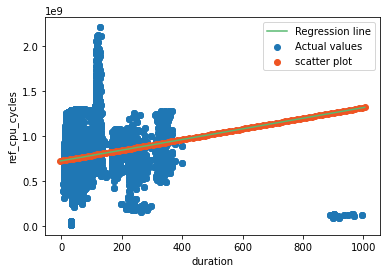

For values of  duration and  ref_cpu_cycles
m is : 589968.7328741524  and c is: 727093293.853271
R square is:  0.016303082918668443


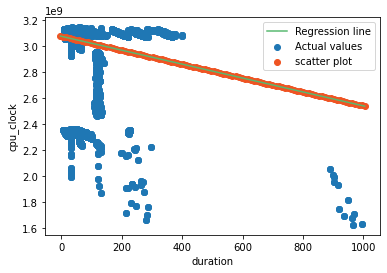

For values of  duration and  cpu_clock
m is : -533124.108019796  and c is: 3072899760.630973
R square is:  0.03086715648063376


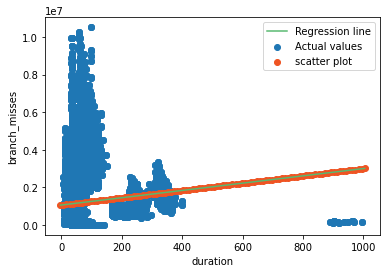

For values of  duration and  branch_misses
m is : 1938.6979174228536  and c is: 1060644.663870223
R square is:  0.005359213202107971


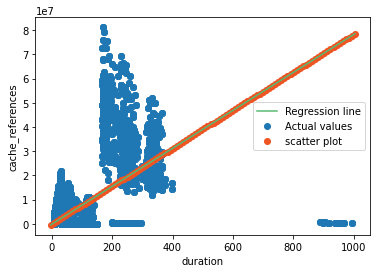

For values of  duration and  cache_references
m is : 78323.73767658573  and c is: -138231.13774338271
R square is:  0.3673510793231487


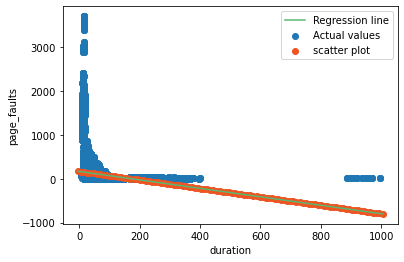

For values of  duration and  page_faults
m is : -0.9608544505279528  and c is: 163.84234870329746
R square is:  0.04092450395477509


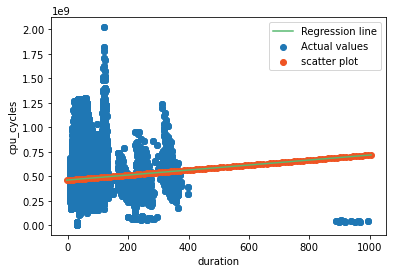

For values of  duration and  cpu_cycles
m is : 254845.6077278147  and c is: 463390652.7624863
R square is:  0.004875062654156825


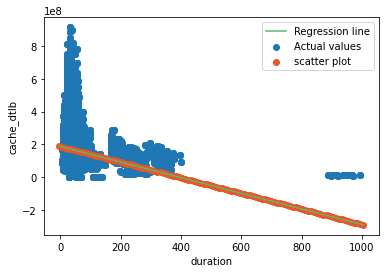

For values of  duration and  cache_dtlb
m is : -477036.86546271143  and c is: 187676303.34420007
R square is:  0.04963859656433345


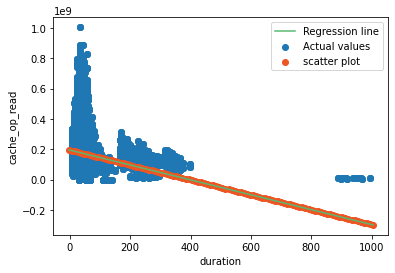

For values of  duration and  cache_op_read
m is : -490358.42285071104  and c is: 194576709.44761145
R square is:  0.04705805673341845


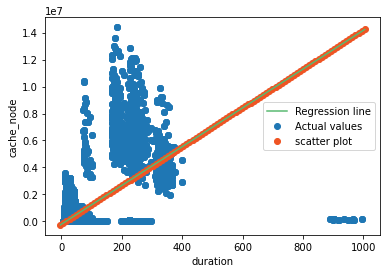

For values of  duration and  cache_node
m is : 14378.543085223979  and c is: -212154.8234339191
R square is:  0.3330915452070843


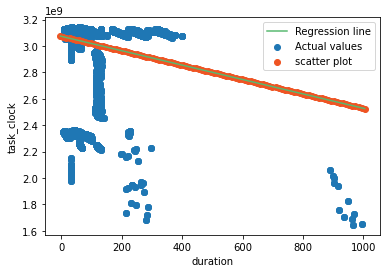

For values of  duration and  task_clock
m is : -543990.4262694183  and c is: 3072378551.5096307
R square is:  0.03148214482980294


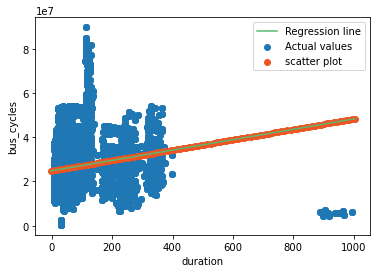

For values of  duration and  bus_cycles
m is : 23400.697236379867  and c is: 24845054.332829982
R square is:  0.015333517227257287


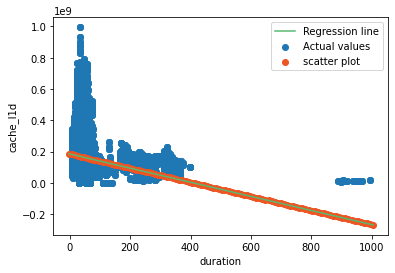

For values of  duration and  cache_l1d
m is : -450848.44132050575  and c is: 184553132.13997352
R square is:  0.04610812723654112


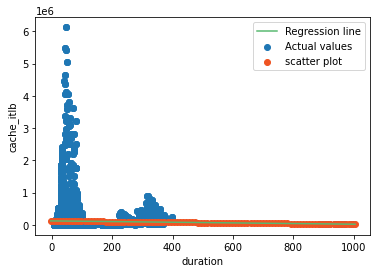

For values of  duration and  cache_itlb
m is : -101.82732393545075  and c is: 123940.88768852456
R square is:  0.0004646321655222829


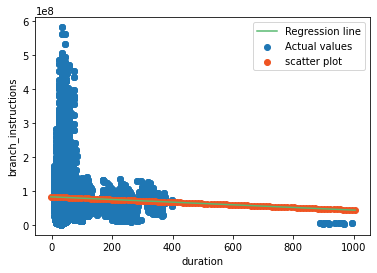

For values of  duration and  branch_instructions
m is : -38876.88327012329  and c is: 82643674.32133597
R square is:  0.0011900584037399797


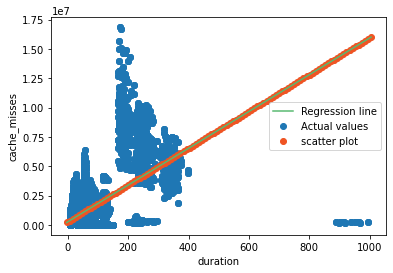

For values of  duration and  cache_misses
m is : 15660.339134595875  and c is: 267368.9672368588
R square is:  0.2932537107258394


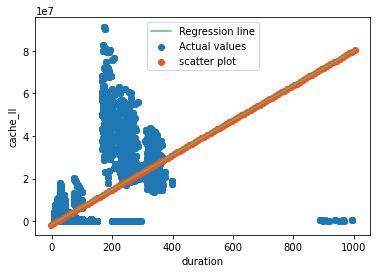

For values of  duration and  cache_ll
m is : 81534.8807013277  and c is: -1478515.8310271068
R square is:  0.3454395744695654


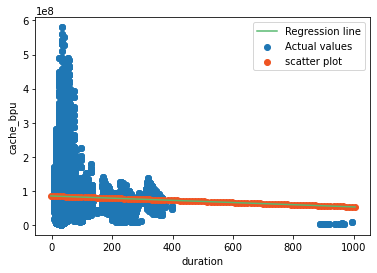

For values of  duration and  cache_bpu
m is : -31955.16148948935  and c is: 85053613.4613811
R square is:  0.0007854347796573125


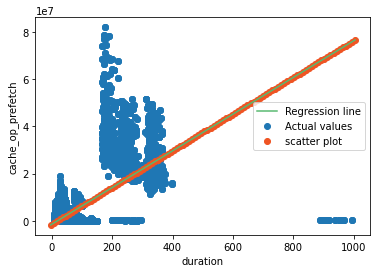

For values of  duration and  cache_op_prefetch
m is : 77901.77062302113  and c is: -1506264.8734812862
R square is:  0.3768068907917199


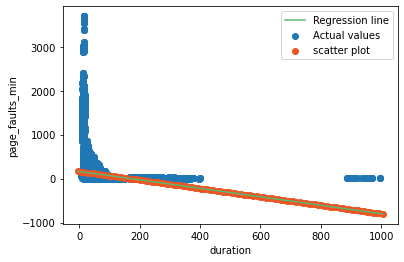

For values of  duration and  page_faults_min
m is : -0.9614066794690799  and c is: 163.92602472378903
R square is:  0.04095951586964086


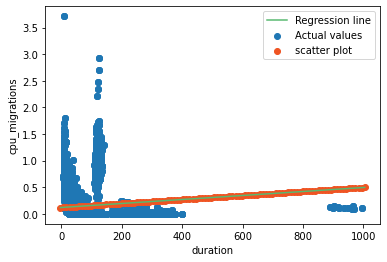

For values of  duration and  cpu_migrations
m is : 0.00037486051763230087  and c is: 0.12102781201009233
R square is:  0.007843320008355859


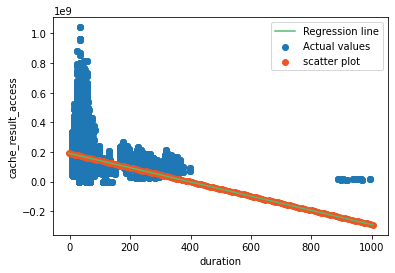

For values of  duration and  cache_result_access
m is : -479752.11676496547  and c is: 190107921.11576018
R square is:  0.04888780242847801


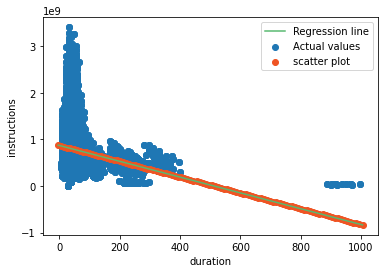

For values of  duration and  instructions
m is : -1699118.634429732  and c is: 870556708.021349
R square is:  0.04332380772742839


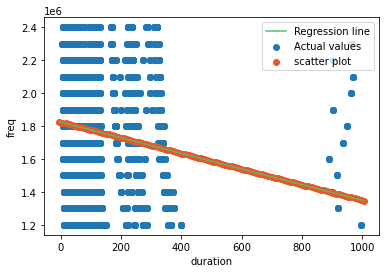

For values of  duration and  freq
m is : -475.2888133913542  and c is: 1824632.5568344886
R square is:  0.005948571492535026


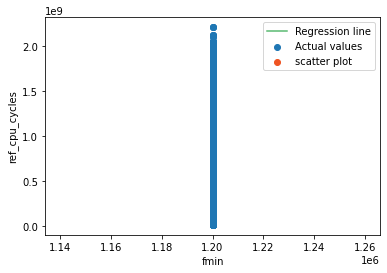

For values of  fmin and  ref_cpu_cycles
m is : nan  and c is: nan
R square is:  nan


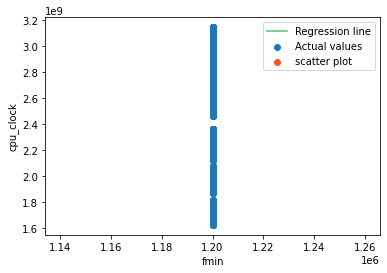

For values of  fmin and  cpu_clock
m is : nan  and c is: nan
R square is:  nan


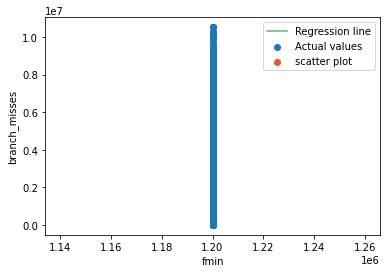

For values of  fmin and  branch_misses
m is : nan  and c is: nan
R square is:  nan


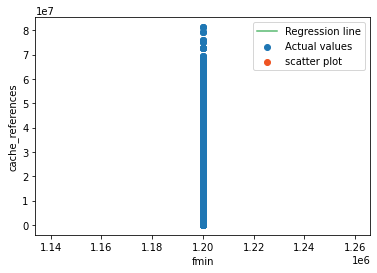

For values of  fmin and  cache_references
m is : nan  and c is: nan
R square is:  nan


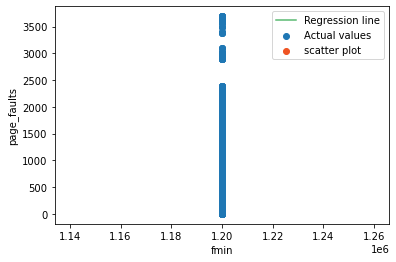

For values of  fmin and  page_faults
m is : nan  and c is: nan
R square is:  nan


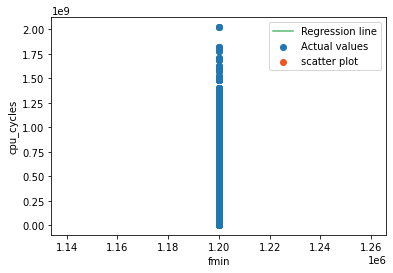

For values of  fmin and  cpu_cycles
m is : nan  and c is: nan
R square is:  nan


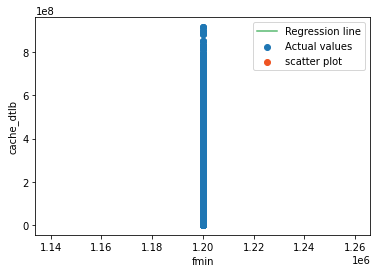

For values of  fmin and  cache_dtlb
m is : nan  and c is: nan
R square is:  nan


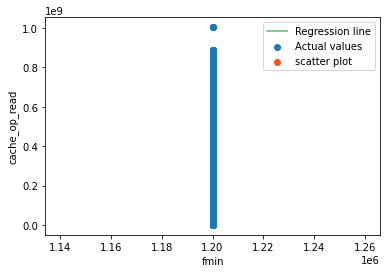

For values of  fmin and  cache_op_read
m is : nan  and c is: nan
R square is:  nan


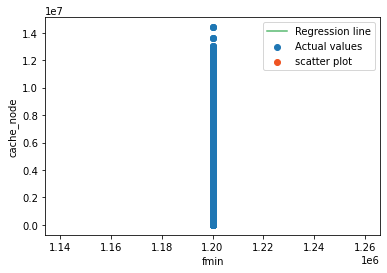

For values of  fmin and  cache_node
m is : nan  and c is: nan
R square is:  nan


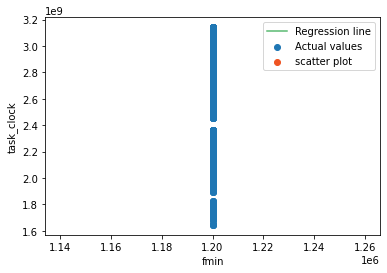

For values of  fmin and  task_clock
m is : nan  and c is: nan
R square is:  nan


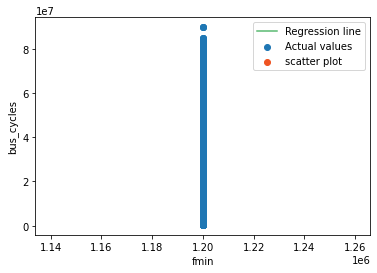

For values of  fmin and  bus_cycles
m is : nan  and c is: nan
R square is:  nan


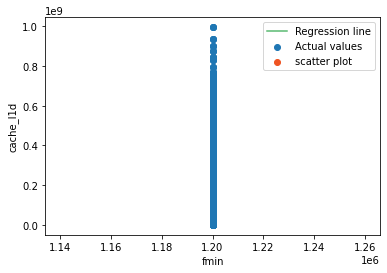

For values of  fmin and  cache_l1d
m is : nan  and c is: nan
R square is:  nan


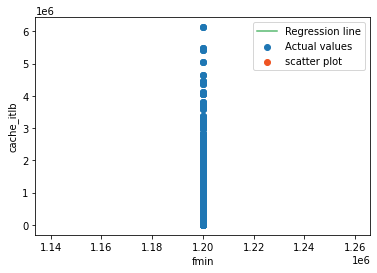

For values of  fmin and  cache_itlb
m is : nan  and c is: nan
R square is:  nan


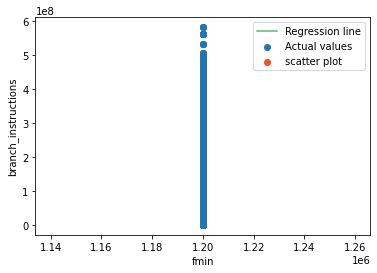

For values of  fmin and  branch_instructions
m is : nan  and c is: nan
R square is:  nan


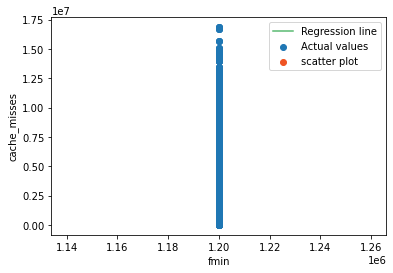

For values of  fmin and  cache_misses
m is : nan  and c is: nan
R square is:  nan


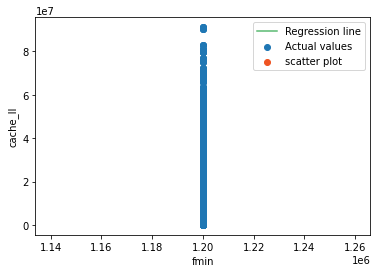

For values of  fmin and  cache_ll
m is : nan  and c is: nan
R square is:  nan


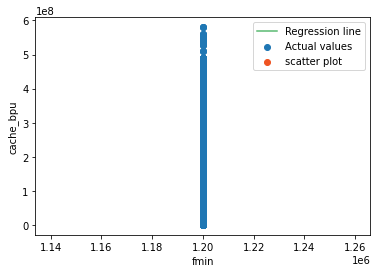

For values of  fmin and  cache_bpu
m is : nan  and c is: nan
R square is:  nan


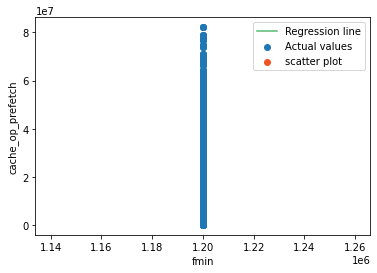

For values of  fmin and  cache_op_prefetch
m is : nan  and c is: nan
R square is:  nan


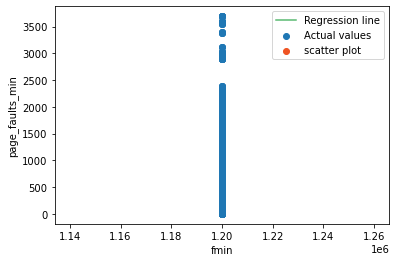

For values of  fmin and  page_faults_min
m is : nan  and c is: nan
R square is:  nan


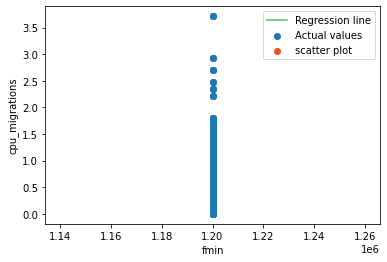

For values of  fmin and  cpu_migrations
m is : nan  and c is: nan
R square is:  nan


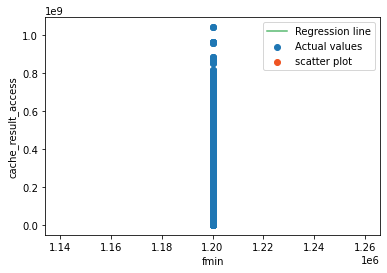

For values of  fmin and  cache_result_access
m is : nan  and c is: nan
R square is:  nan


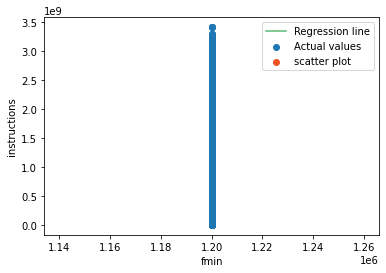

For values of  fmin and  instructions
m is : nan  and c is: nan
R square is:  nan


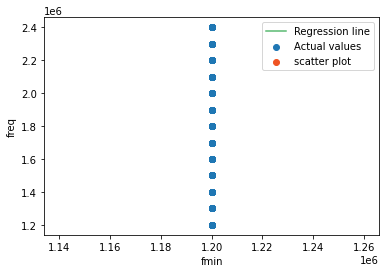

For values of  fmin and  freq
m is : nan  and c is: nan
R square is:  nan


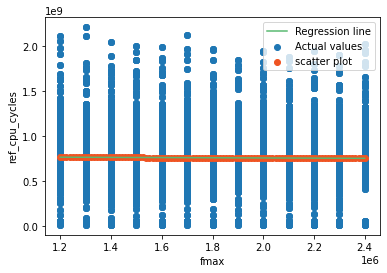

For values of  fmax and  ref_cpu_cycles
m is : -10.472555635571709  and c is: 779330371.1633085
R square is:  0.00019508307772919675


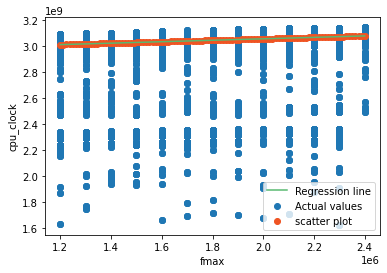

For values of  fmax and  cpu_clock
m is : 55.69855076079464  and c is: 2942578317.572618
R square is:  0.012794704796996736


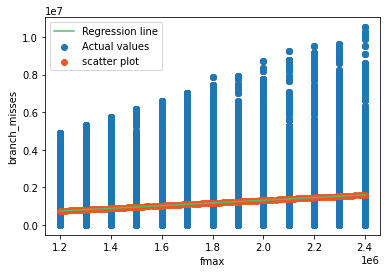

For values of  fmax and  branch_misses
m is : 0.7136047153264762  and c is: -112424.38617979898
R square is:  0.027573930021472126


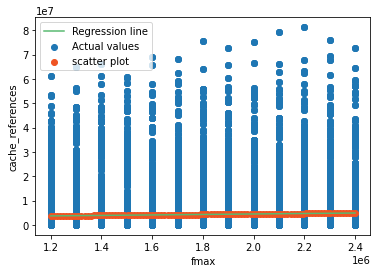

For values of  fmax and  cache_references
m is : 0.9894070285940167  and c is: 2518629.918242395
R square is:  0.0022261119142346075


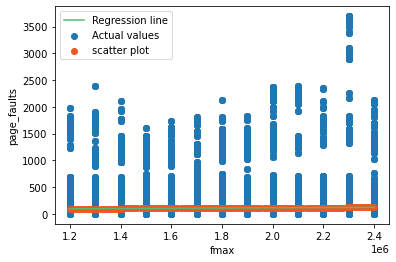

For values of  fmax and  page_faults
m is : 2.155868766316292e-05  and c is: 70.67199999814257
R square is:  0.0007823756998451836


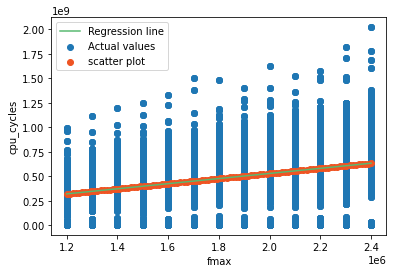

For values of  fmax and  cpu_cycles
m is : 260.75885955086784  and c is: 9052233.52558273
R square is:  0.1938235490293978


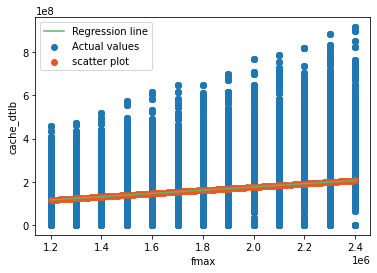

For values of  fmax and  cache_dtlb
m is : 75.27408551582332  and c is: 25339861.27539721
R square is:  0.04693632526366498


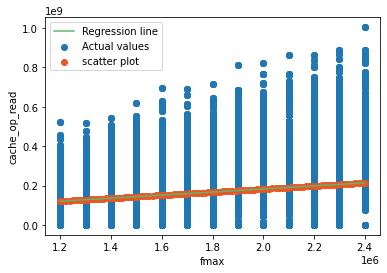

For values of  fmax and  cache_op_read
m is : 77.62040115350561  and c is: 27267846.64945963
R square is:  0.04477761681296255


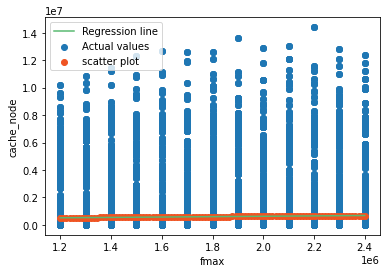

For values of  fmax and  cache_node
m is : 0.13774348300490735  and c is: 354489.5653133685
R square is:  0.0011608563027180052


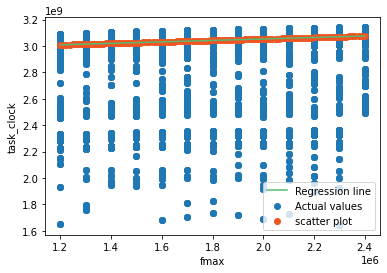

For values of  fmax and  task_clock
m is : 55.31915523459873  and c is: 2942123785.984422
R square is:  0.012363327625867448


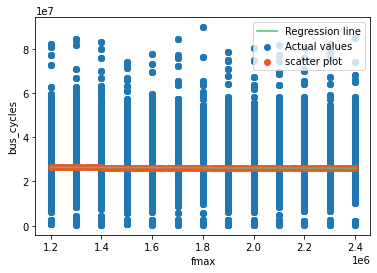

For values of  fmax and  bus_cycles
m is : -0.33713015944828123  and c is: 26776318.582466878
R square is:  0.00012085980854936729


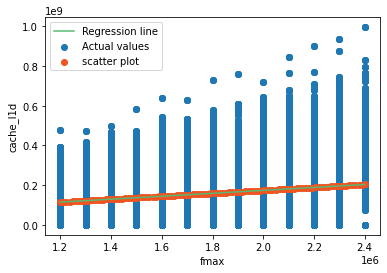

For values of  fmax and  cache_l1d
m is : 73.95862195619912  and c is: 26064591.648280606
R square is:  0.04711904271922773


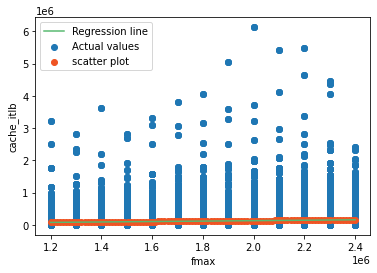

For values of  fmax and  cache_itlb
m is : 0.06723356420478759  and c is: -2692.56634112513
R square is:  0.007692285244062513


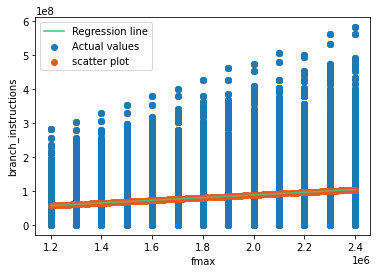

For values of  fmax and  branch_instructions
m is : 39.20032938945135  and c is: 9970963.958506554
R square is:  0.04594807557474079


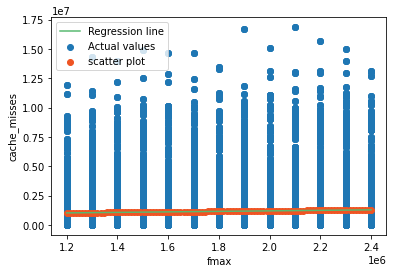

For values of  fmax and  cache_misses
m is : 0.2171520623003923  and c is: 763848.3484138951
R square is:  0.0021412708607974063


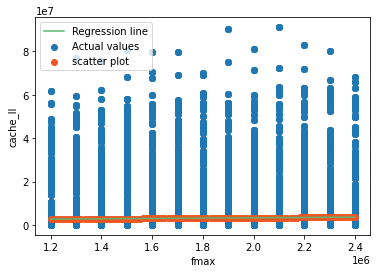

For values of  fmax and  cache_ll
m is : 0.7364783389272557  and c is: 1814888.8629392206
R square is:  0.0010703052746295905


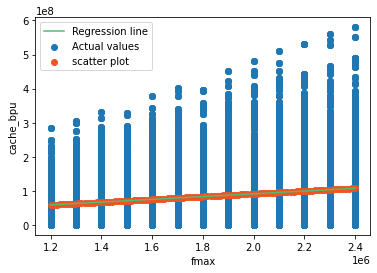

For values of  fmax and  cache_bpu
m is : 40.53660456618303  and c is: 10370641.571892202
R square is:  0.047998242063851504


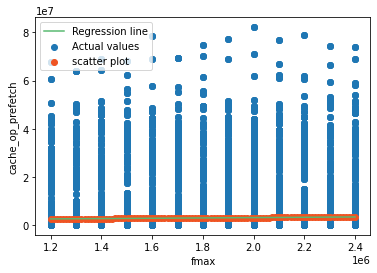

For values of  fmax and  cache_op_prefetch
m is : 0.6727689656087608  and c is: 1695925.354141236
R square is:  0.0010672313581261417


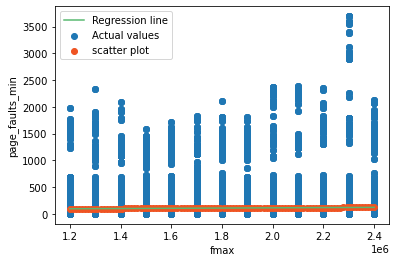

For values of  fmax and  page_faults_min
m is : 2.1682123968550147e-05  and c is: 70.50249936936991
R square is:  0.0007911278822499979


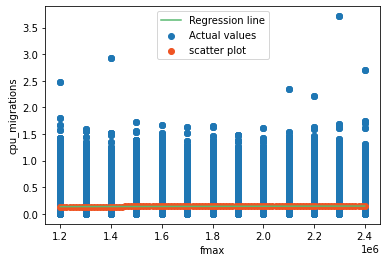

For values of  fmax and  cpu_migrations
m is : 8.575981333285658e-09  and c is: 0.1268392722498527
R square is:  0.00015589446182373567


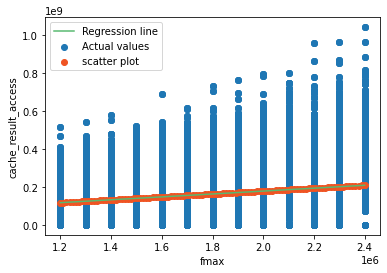

For values of  fmax and  cache_result_access
m is : 76.39757805908218  and c is: 25597991.071312457
R square is:  0.04707912666660352


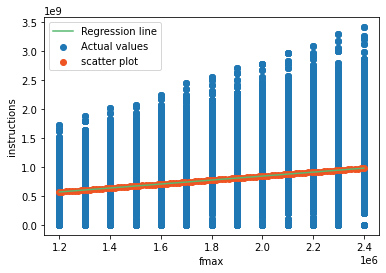

For values of  fmax and  instructions
m is : 342.118040238375  and c is: 159303018.65696275
R square is:  0.06670120272719948


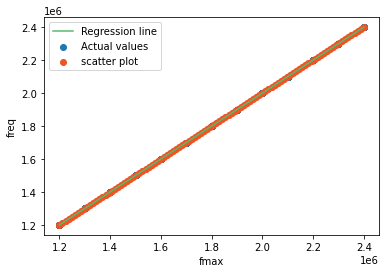

For values of  fmax and  freq
m is : 1.0  and c is: 0.0
R square is:  1.0


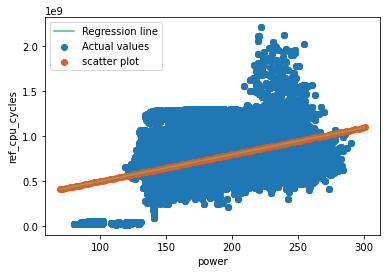

For values of  power and  ref_cpu_cycles
m is : 2974597.9691337044  and c is: 202831420.93498564
R square is:  0.17644553322460144


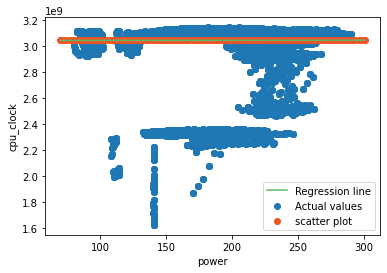

For values of  power and  cpu_clock
m is : 6187.658444314296  and c is: 3041548474.7037663
R square is:  1.7702516708073546e-06


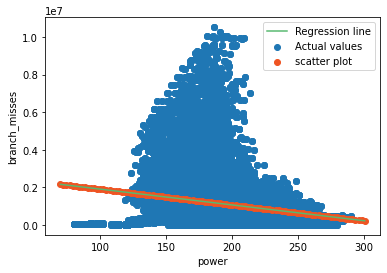

For values of  power and  branch_misses
m is : -8404.212729360768  and c is: 2746041.2897068895
R square is:  0.04287628892346729


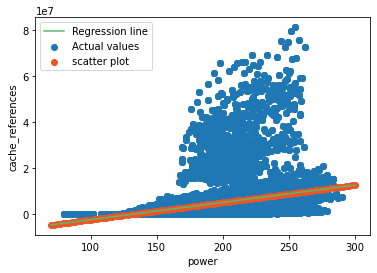

For values of  power and  cache_references
m is : 74863.08487944155  and c is: -9737892.819015507
R square is:  0.1428802883507907


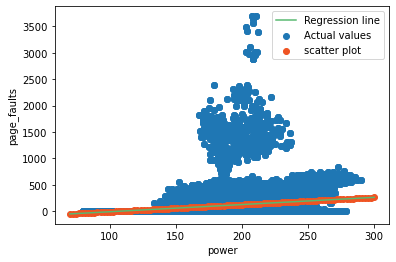

For values of  power and  page_faults
m is : 1.3591789692584546  and c is: -145.38801197496014
R square is:  0.03486292904170196


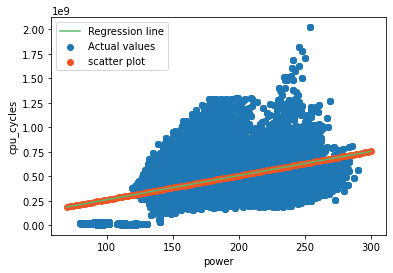

For values of  power and  cpu_cycles
m is : 2460226.987089131  and c is: 16583839.542037845
R square is:  0.19342767874545774


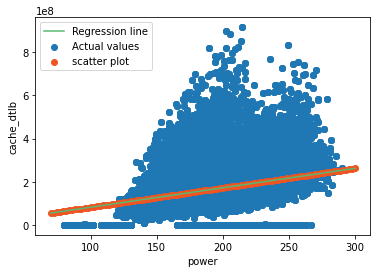

For values of  power and  cache_dtlb
m is : 898613.2266623694  and c is: -7809054.472990602
R square is:  0.0749900408524995


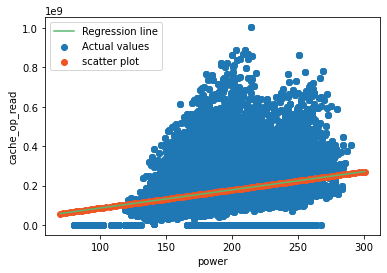

For values of  power and  cache_op_read
m is : 924987.2906525806  and c is: -6607620.533438265
R square is:  0.07128868586944681


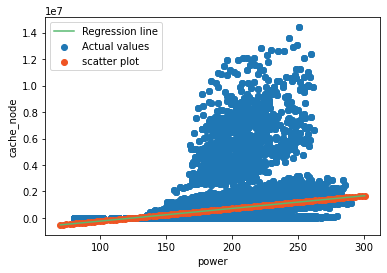

For values of  power and  cache_node
m is : 9564.577159572724  and c is: -1191036.370131338
R square is:  0.06274913755752554


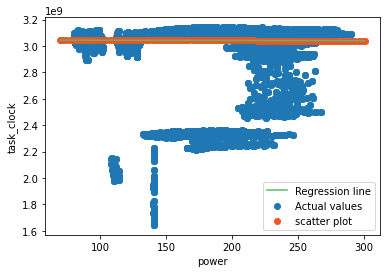

For values of  power and  task_clock
m is : -16612.456605144103  and c is: 3044686421.9431033
R square is:  1.2499478268535036e-05


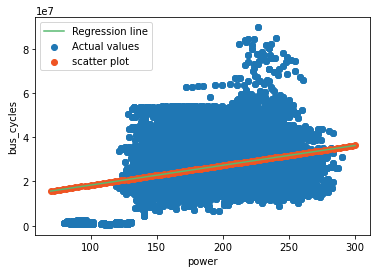

For values of  power and  bus_cycles
m is : 89393.23675853238  and c is: 9410971.27553824
R square is:  0.09526555090727895


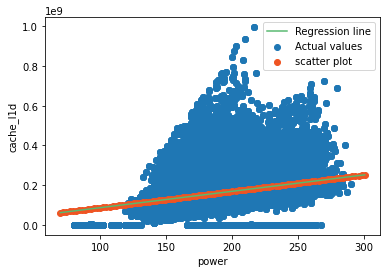

For values of  power and  cache_l1d
m is : 824258.649986321  and c is: 4490707.204328895
R square is:  0.06561237111861151


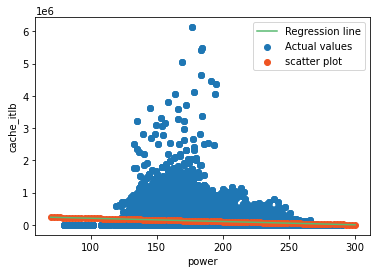

For values of  power and  cache_itlb
m is : -1014.8714503817719  and c is: 308440.596211941
R square is:  0.01964920798952452


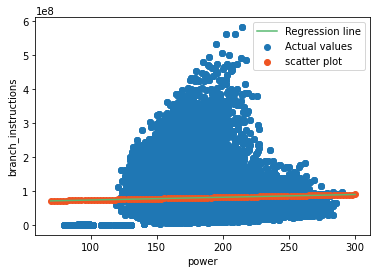

For values of  power and  branch_instructions
m is : 81537.4856882951  and c is: 65155545.25411456
R square is:  0.002228652684894694


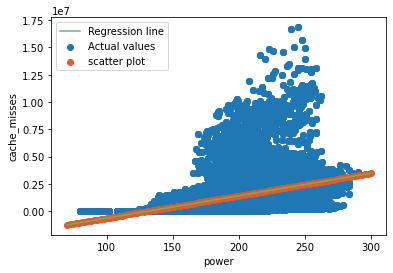

For values of  power and  cache_misses
m is : 20510.23642014824  and c is: -2690995.927928688
R square is:  0.21415335949576575


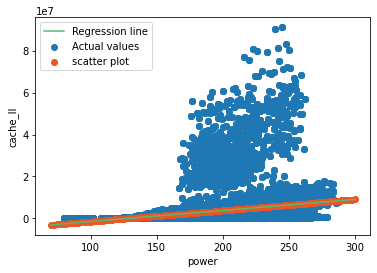

For values of  power and  cache_ll
m is : 52739.585356882184  and c is: -6748654.176831424
R square is:  0.06153199553419597


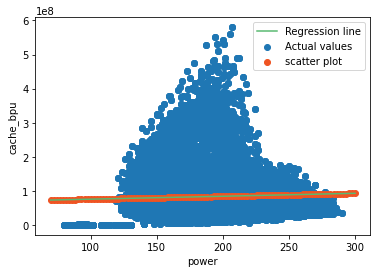

For values of  power and  cache_bpu
m is : 85921.17492744485  and c is: 67135620.75430772
R square is:  0.0024175244621142955


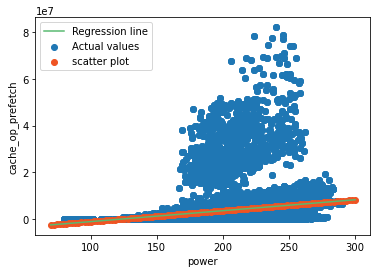

For values of  power and  cache_op_prefetch
m is : 46764.31227049404  and c is: -5861915.658975232
R square is:  0.05780902575784552


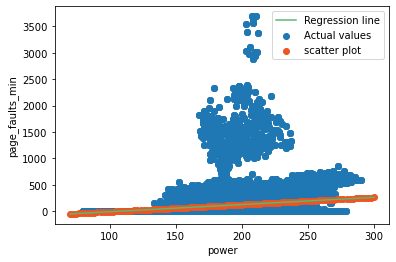

For values of  power and  page_faults_min
m is : 1.3600701024768527  and c is: -145.50267715983298
R square is:  0.03489839873206413


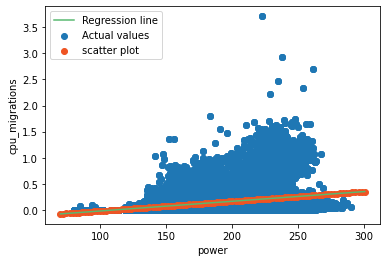

For values of  power and  cpu_migrations
m is : 0.0018590826372333479  and c is: -0.2062810043681374
R square is:  0.08212971035347316


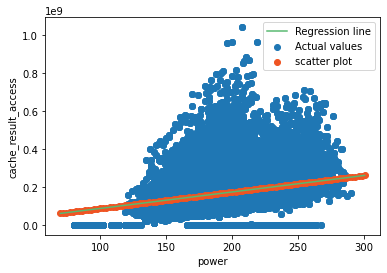

For values of  power and  cache_result_access
m is : 867328.5323748547  and c is: 333994.5664207041
R square is:  0.0680262219116925


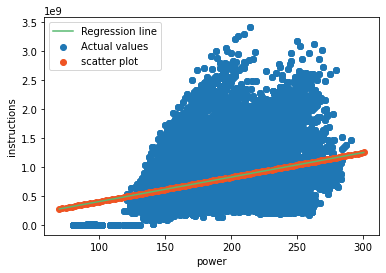

For values of  power and  instructions
m is : 4219804.33061109  and c is: -16787014.69544232
R square is:  0.11376435503547333


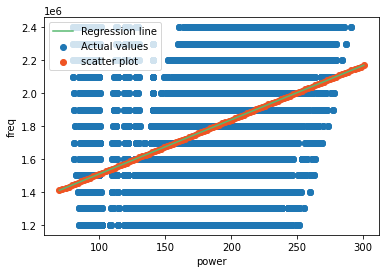

For values of  power and  freq
m is : 3289.492773060634  and c is: 1181008.406551703
R square is:  0.12131031806095638


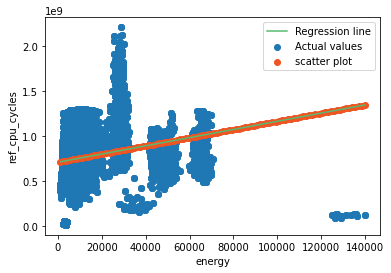

For values of  energy and  ref_cpu_cycles
m is : 4543.278557566555  and c is: 710976703.5377094
R square is:  0.038648364716200145


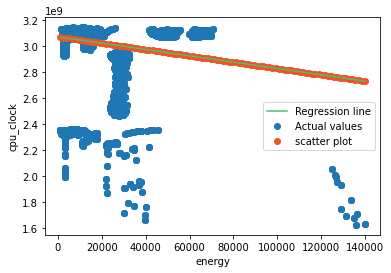

For values of  energy and  cpu_clock
m is : -2428.1620677966016  and c is: 3069178295.1933017
R square is:  0.025596227815625983


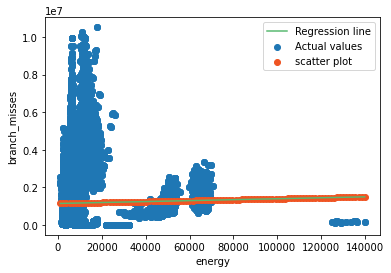

For values of  energy and  branch_misses
m is : 2.5239637045645473  and c is: 1142920.5241792637
R square is:  0.0003631011329734424


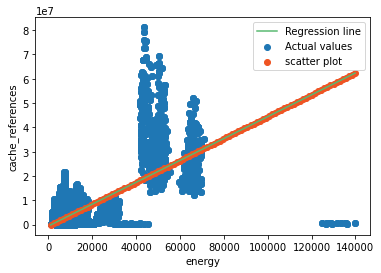

For values of  energy and  cache_references
m is : 450.2463836582655  and c is: -610901.9775258815
R square is:  0.4852612635078529


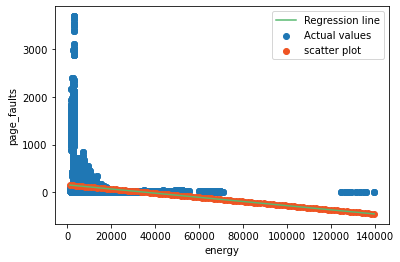

For values of  energy and  page_faults
m is : -0.004360300728574522  and c is: 156.96072142354097
R square is:  0.03368850550228408


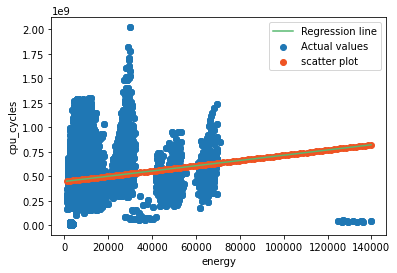

For values of  energy and  cpu_cycles
m is : 2676.915131974293  and c is: 448641293.7077382
R square is:  0.02150184602058025


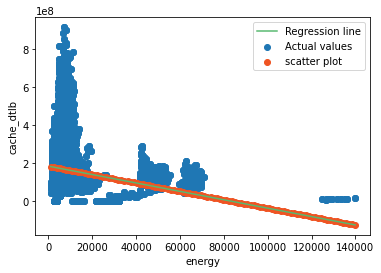

For values of  energy and  cache_dtlb
m is : -2212.078658436931  and c is: 184775543.69153148
R square is:  0.04266751862867324


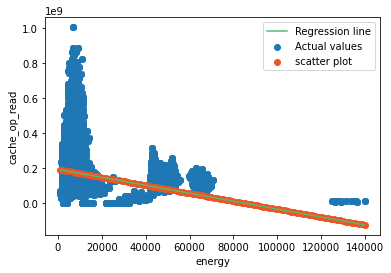

For values of  energy and  cache_op_read
m is : -2270.6473918799147  and c is: 191560006.39135236
R square is:  0.04033543567122766


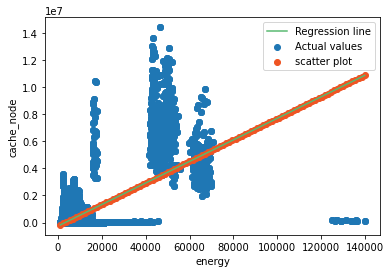

For values of  energy and  cache_node
m is : 79.49588020969014  and c is: -264483.55037868465
R square is:  0.407008738890585


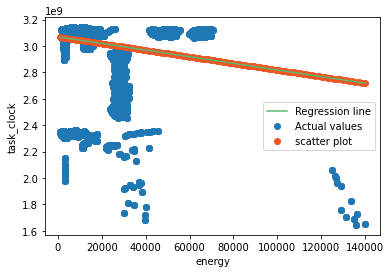

For values of  energy and  task_clock
m is : -2509.712189252477  and c is: 3068930708.4370475
R square is:  0.02678614932654466


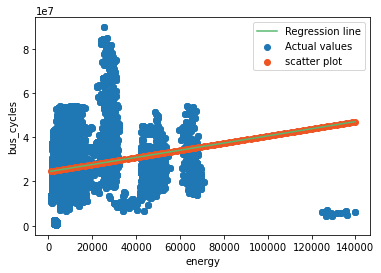

For values of  energy and  bus_cycles
m is : 162.01916069441813  and c is: 24404058.229902674
R square is:  0.029383098610855196


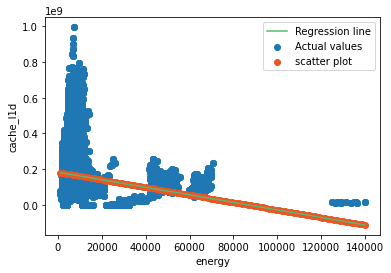

For values of  energy and  cache_l1d
m is : -2113.5887508753676  and c is: 182061789.73064393
R square is:  0.04050773515035122


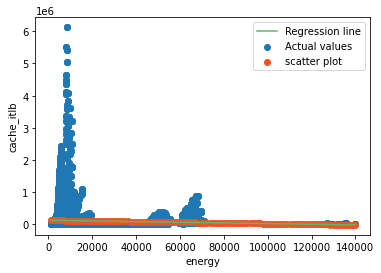

For values of  energy and  cache_itlb
m is : -1.0354962726510417  and c is: 129462.4314323746
R square is:  0.0019206946960746984


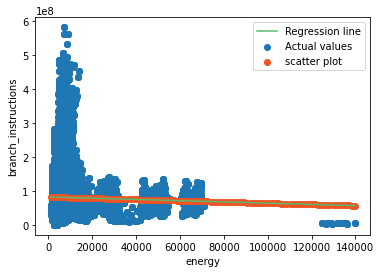

For values of  energy and  branch_instructions
m is : -182.17475260969766  and c is: 82427961.1324564
R square is:  0.001044581710402781


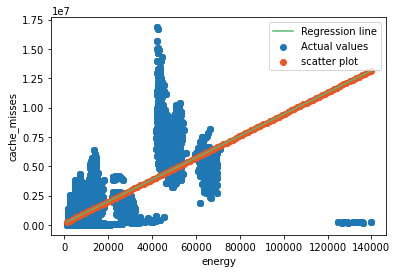

For values of  energy and  cache_misses
m is : 92.95260660670971  and c is: 140935.50105987967
R square is:  0.4129951797579863


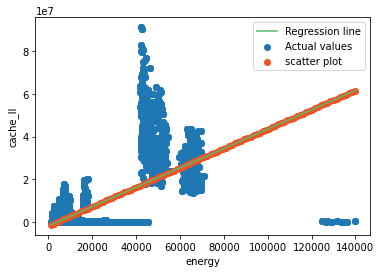

For values of  energy and  cache_ll
m is : 452.734939641444  and c is: -1796465.2646069205
R square is:  0.42574923934776954


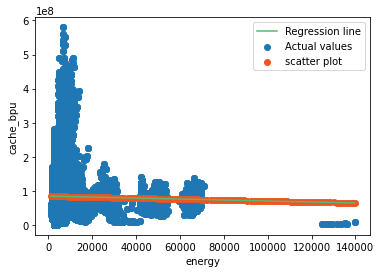

For values of  energy and  cache_bpu
m is : -144.72959667540272  and c is: 84821687.36254969
R square is:  0.0006440557248852397


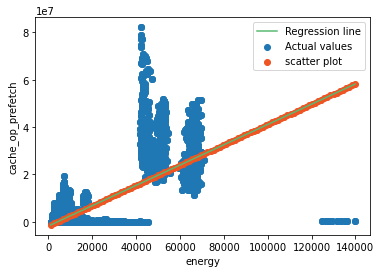

For values of  energy and  cache_op_prefetch
m is : 428.6422777774373  and c is: -1767322.3448845646
R square is:  0.45603149040802426


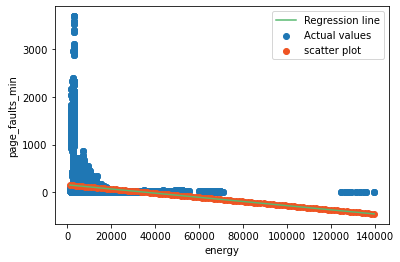

For values of  energy and  page_faults_min
m is : -0.004362728526173483  and c is: 157.0395900838343
R square is:  0.03371611837553912


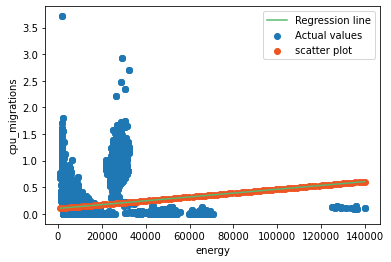

For values of  energy and  cpu_migrations
m is : 3.6009176577228894e-06  and c is: 0.10300229696068193
R square is:  0.028931274158175313


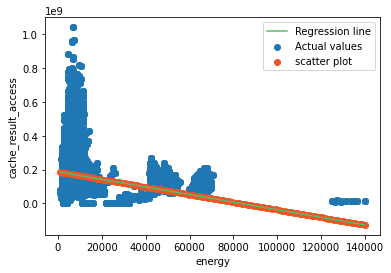

For values of  energy and  cache_result_access
m is : -2248.03071463566  and c is: 187445313.57299092
R square is:  0.04290934093121612


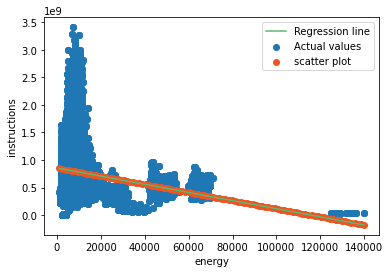

For values of  energy and  instructions
m is : -7400.336363487393  and c is: 855006500.6736671
R square is:  0.032852073074931876


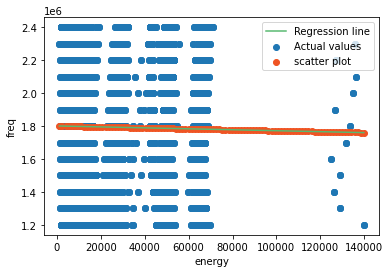

For values of  energy and  freq
m is : -0.2899553670993174  and c is: 1800877.4280942518
R square is:  8.849942495192664e-05


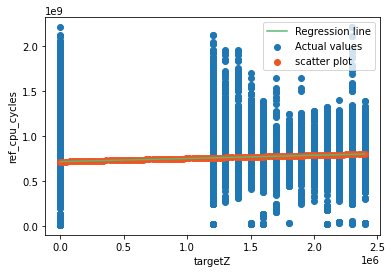

For values of  targetZ and  ref_cpu_cycles
m is : 35.33532690780124  and c is: 717131220.0275813
R square is:  0.018745846127556587


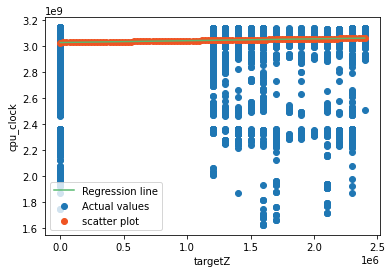

For values of  targetZ and  cpu_clock
m is : 14.127998225513963  and c is: 3025367067.4603376
R square is:  0.006948264102703772


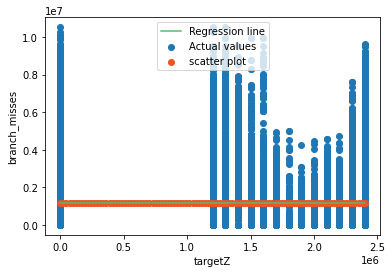

For values of  targetZ and  branch_misses
m is : -0.0027364524723317977  and c is: 1173793.5097142893
R square is:  3.4224068840016386e-06


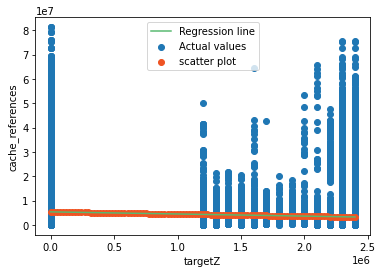

For values of  targetZ and  cache_references
m is : -0.869869064541443  and c is: 5365027.006814955
R square is:  0.014523702972312202


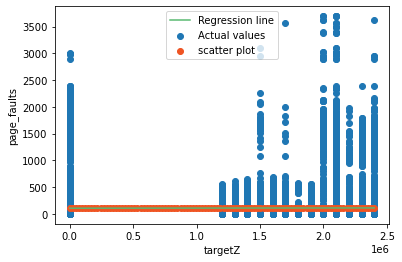

For values of  targetZ and  page_faults
m is : 2.244708214106519e-06  and c is: 106.67313570675172
R square is:  7.159176628435127e-05


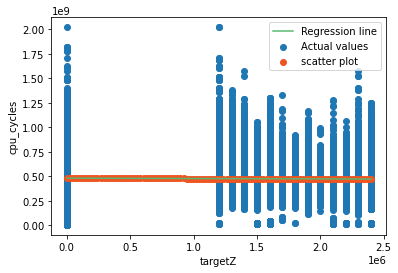

For values of  targetZ and  cpu_cycles
m is : -3.690010808788094  and c is: 482352074.70159394
R square is:  0.00032760931882325206


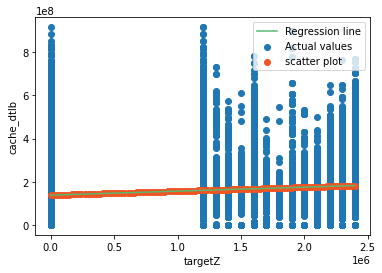

For values of  targetZ and  cache_dtlb
m is : 18.45095457550056  and c is: 138013647.43946669
R square is:  0.023802817265223597


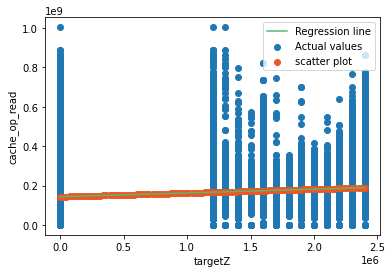

For values of  targetZ and  cache_op_read
m is : 19.259121998330258  and c is: 143167655.55284148
R square is:  0.02326776949482723


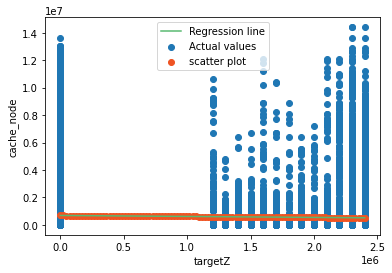

For values of  targetZ and  cache_node
m is : -0.07033167511478404  and c is: 688442.1564237103
R square is:  0.0025545290153194955


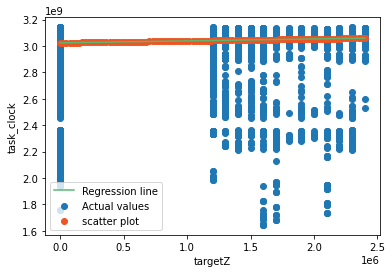

For values of  targetZ and  task_clock
m is : 14.753196046407783  and c is: 3023463089.1050506
R square is:  0.007422139296125674


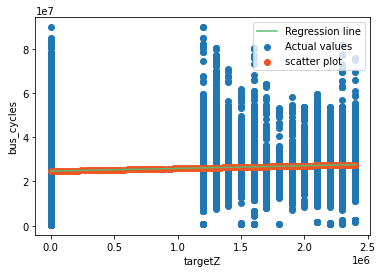

For values of  targetZ and  bus_cycles
m is : 1.2149711698611187  and c is: 24678933.71220462
R square is:  0.01324924740635347


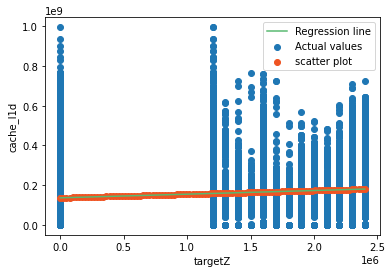

For values of  targetZ and  cache_l1d
m is : 18.329150622904127  and c is: 136523055.8266667
R square is:  0.02442733522481111


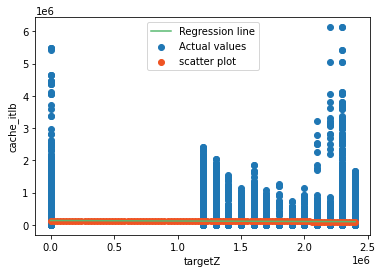

For values of  targetZ and  cache_itlb
m is : -0.015048575967444905  and c is: 136645.75124881777
R square is:  0.0032527186159022614


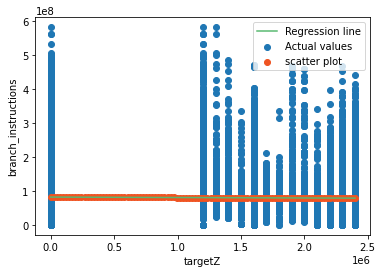

For values of  targetZ and  branch_instructions
m is : -1.291807130240574  and c is: 82027678.98651558
R square is:  0.00042116844313400126


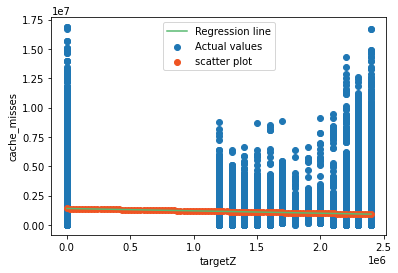

For values of  targetZ and  cache_misses
m is : -0.20198684052878052  and c is: 1402155.628654814
R square is:  0.015637323368367873


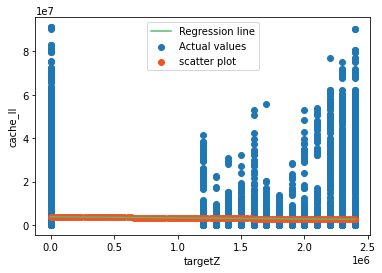

For values of  targetZ and  cache_ll
m is : -0.4879131016887429  and c is: 3737758.738848341
R square is:  0.003965018742163928


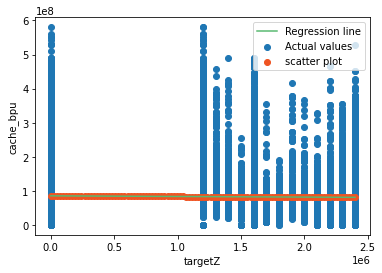

For values of  targetZ and  cache_bpu
m is : -1.8245478897328269  and c is: 85483515.05298002
R square is:  0.0008207553140199275


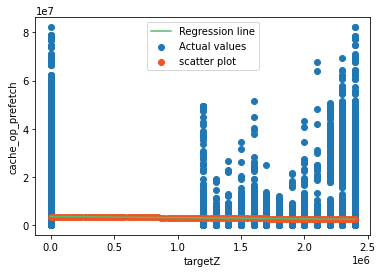

For values of  targetZ and  cache_op_prefetch
m is : -0.48100455537437464  and c is: 3495783.9152491335
R square is:  0.004604660674479177


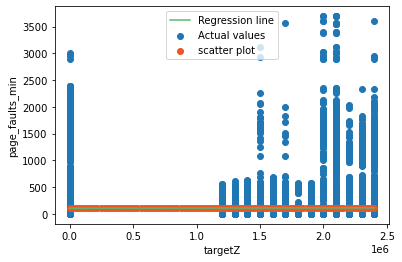

For values of  targetZ and  page_faults_min
m is : 2.180794921431743e-06  and c is: 106.8039891538561
R square is:  6.755309858486047e-05


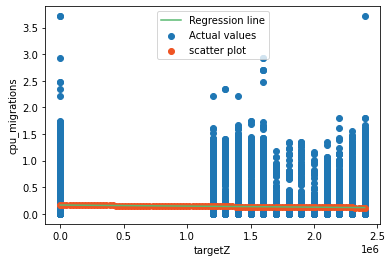

For values of  targetZ and  cpu_migrations
m is : -1.9866833861835445e-08  and c is: 0.16664206721228025
R square is:  0.007061434382449661


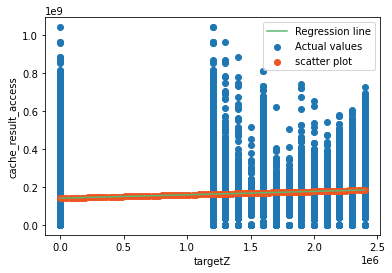

For values of  targetZ and  cache_result_access
m is : 17.907850364422213  and c is: 140958133.4733838
R square is:  0.021833768658311437


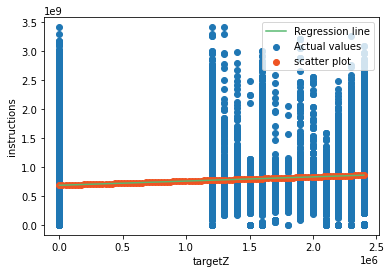

For values of  targetZ and  instructions
m is : 72.69283072614078  and c is: 685107235.6433877
R square is:  0.02541777028518133


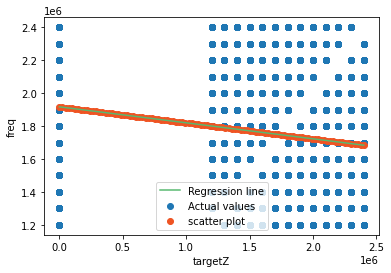

For values of  targetZ and  freq
m is : -0.09705216110649333  and c is: 1916843.5770033605
R square is:  0.07950290456676079


In [122]:
for knowledge_feature in knowledge[2:]:
    for vector_feature in vector:
        knowledge_values = knowledge[knowledge_feature].values
        vector_values = vector[vector_feature].values
        linear_regression(knowledge_values,vector_values,knowledge_feature,vector_feature)

In [123]:
max_values = max(zip(error_dict.values(), error_dict.keys()))
print(max_values)

([0.17644553322460144, 1.7702516708073546e-06, 0.04287628892346729, 0.1428802883507907, 0.03486292904170196, 0.19342767874545774, 0.0749900408524995, 0.07128868586944681, 0.06274913755752554, 1.2499478268535036e-05, 0.09526555090727895, 0.06561237111861151, 0.01964920798952452, 0.002228652684894694, 0.21415335949576575, 0.06153199553419597, 0.0024175244621142955, 0.05780902575784552, 0.03489839873206413, 0.08212971035347316, 0.0680262219116925, 0.11376435503547333, 0.12131031806095638], 'power')


In [124]:
knowledge.columns

Index(['duration', 'fmin', 'fmax', 'power', 'energy', 'targetZ'], dtype='object')

In [125]:
vector.columns

Index(['ref_cpu_cycles', 'cpu_clock', 'branch_misses', 'cache_references',
       'page_faults', 'cpu_cycles', 'cache_dtlb', 'cache_op_read',
       'cache_node', 'task_clock', 'bus_cycles', 'cache_l1d', 'cache_itlb',
       'branch_instructions', 'cache_misses', 'cache_ll', 'cache_bpu',
       'cache_op_prefetch', 'page_faults_min', 'cpu_migrations',
       'cache_result_access', 'instructions', 'freq'],
      dtype='object')

# Lasso and Ridge Regression 

This will help to fit data more precisely and check if its overfitted or not.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [9]:
# X = knowledge[['duration']]
# y = vector['ref_cpu_cycles']
X = knowledge
y = vector

In [10]:
# training and testing datasets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [17]:
# found overfitting in above results so to cross check overall accuracy by linear regression 
lin_regressor=LinearRegression().fit(train_x , train_y)

print("Linear Regression \nAccuracy by training datasets {} ".format(lin_regressor.score(train_x,train_y)))
print("Accuracy by test datasets {} ".format(lin_regressor.score(test_x,test_y)))

Linear Regression 
Accuracy by training datasets 0.2697778736632717 
Accuracy by test datasets 0.27175638694786364 


In [18]:
#initialize lasso regression
lasso_reg = linear_model.Lasso(alpha = 1, max_iter = 100 , tol = 0.1)

lasso_reg.fit(train_x,train_y)
print("Lasso Regression \nAccuracy by training datasets {} ".format(lasso_reg.score(train_x,train_y)))
print("Accuracy by test datasets {} ".format(lasso_reg.score(test_x,test_y)))

Lasso Regression 
Accuracy by training datasets 0.2669123710214679 
Accuracy by test datasets 0.26940835810926383 


In [19]:
#initialize ridge regression
ridge_reg = linear_model.Ridge(alpha = 1, max_iter = 100 , tol = 0.1)

ridge_reg.fit(train_x,train_y)
print("Ridge Regresiion\nAccuracy by training datasets {} ".format(ridge_reg.score(train_x,train_y)))
print("Accuracy by test datasets {} ".format(ridge_reg.score(test_x,test_y)))

Ridge Regresiion
Accuracy by training datasets 0.26977787366326683 
Accuracy by test datasets 0.2717563872264711 
